__Background:__ Markov chains could be used to model a plethora of phenomena that happen in our world. The only assumption that we would have to accept is the fact that what we are trying to model depends only on the last step, and not on all previous steps (the whole history). 

For example, Sahin and Sen (2001) model hourly wind speeds in a NW part of Turkey as a Markov chain ${(X_n)}_{n\in \mathbb{N}}$ with 7 states representing different wind speed levels. Since in Python arrays are indexed starting from $0$, let us consider the states to be $S=\{0,1,2,3,4,5,6 \}$, with $0$ representing the lowest wind speed level.

In [1]:
import numpy as np
import pandas as pd
from numpy import linalg
import matplotlib.pyplot as plt

## Problem 1 (8 Points)

1. <font color="red">__(3 Points)__</font> Compute the stationary distribution $\pi$ as a right-eigenvector of $P^T$ to the eigenvalue 1. 

In [2]:
P = np.array([[0.756,0.113,0.129,0.002,0,0,0],\
                [0.174,0.821,0.004,0.001,0,0,0],\
                [0.141,0.001,0.776,0.082,0,0,0],\
                [0.003,0,0.192,0.753,0.052,0,0],\
                [0,0,0.002,0.227,0.735,0.036,0],\
                [0,0,0,0.007,0.367,0.604,0.022],\
                [0,0,0,0,0.053,0.158,0.789]])

In [3]:
df = pd.DataFrame(P)

In [4]:
df

,0,1,2,3,4,5,6
0,0.756,0.113,0.129,0.002,0.000,0.000,0.000
1,0.174,0.821,0.004,0.001,0.000,0.000,0.000
2,0.141,0.001,0.776,0.082,0.000,0.000,0.000
3,0.003,0.000,0.192,0.753,0.052,0.000,0.000
4,0.000,0.000,0.002,0.227,0.735,0.036,0.000
5,0.000,0.000,0.000,0.007,0.367,0.604,0.022
6,0.000,0.000,0.000,0.000,0.053,0.158,0.789


In [5]:
val, vec = linalg.eig(P.T)

In [6]:
print("Eigenvalue: ", val[0])
print("Eigenvector: ", vec[:, 0])

Eigenvalue:  1.0000000000000027
Eigenvector:  [6.38151075e-01 4.06193367e-01 5.97541256e-01 2.59299786e-01
 5.87100708e-02 5.56895227e-03 5.80649052e-04]


In [7]:
pi = vec[:, 0]/sum(vec[:, 0])

In [8]:
print("Stationary distribution: ", pi)

Stationary distribution:  [3.24586174e-01 2.06604292e-01 3.03930586e-01 1.31889029e-01
 2.98620155e-02 2.83256580e-03 2.95338614e-04]


2. <font color="red">__(1 Points)__</font> What proportion of time in the long-run is the wind more than 30 M/Hr?

In [9]:
print("Proportion of time wind > 30mph: ", sum(pi[3:7]))

Proportion of time wind > 30mph:  0.1648789487235481


2. <font color="red">__(4 Points)__</font> 

Recall from class that the following theorem holds true:

<b>Theorem:</b> For any finite irreducible Markov chain we have that the stationary distribution $\pi$ satisfies

\begin{equation*}
\pi_j=\frac{1}{\mathbb{E}[T_j\,| \,X_0=j]} \quad \text{ for all } j \in \mathcal{S} 
\end{equation*}

where $T_j = \min\{n>0:X_n=j \}$ denotes the first visiting time of state $j$ after having started in $j$ at time 0.

Hence, in order to find the expected return time to state $j$, we just have to compute $1/\pi_j$.

Check numerically that this theorem holds for state $0$. That is, simulate $N=10^5$ realizations of the Markov Chain with transition matrix $P$ that start in state $0$. Each Markov chain should be simulated until state $0$ is reached again (so you do not actually have to run each Markov chain for many steps). For each of the $N$ simulations, record how many steps it took to get back to state $0$. A good estimate of $\mathbb{E}[T_0 \,| \, X_0=0]$ will then be the average of all of those times (this is Law of Large Numbers again). Because of the above theorem, the estimate should be close to $1/\pi_0$.

In [10]:
def timeToZero(initState):
    time = 0
    zero = False
    current = initState
    while not zero:
        time +=1
        X_n = np.random.choice(range(7), 1, p=P[current])
        if X_n[0] == 0:
            zero = True
        else:
            current = X_n[0]
    return time

In [11]:
def simTrajectory(initState, N):
    return np.array([timeToZero(initState) for i in range(N)])

In [12]:
returnTime = simTrajectory(0, 10**5)

Finally estimate the mean of returnTime

In [13]:
print(np.mean(returnTime))
print(1/pi[0])

3.07437
3.080845952325872


# Problem 2 (7 pt)

Consider a Markov chain with states  $S=\{0,1,2,3,4 \}$. The transition matrix is given by: 

\begin{gather*}
P=\begin{array}{cccccccc}
 0.2 & 0.6 & 0 & 0 & 0.2  \\
0.4 & 0 & 0.4 & 0 & 0.2 \\
0 & 0.7 & 0.2 & 0.1 & 0 \\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 1\\\end{array}
\end{gather*}

We start with $X_0 = 0$. We are interested in counting the total number of times $E_0 = \sum_{n>0} 1_{\{ X_n = 0\}}$ that $X_n = 0$. 

1. <font color="red">__(2 Points)__</font> Describe what happens to $X_n$ in the long-run, as $n \to \infty$. To support your answer, compute $P^n$ for $n=10,25,100$. Use this to explain why $E_0$ is a random variable with finite mean (i.e. the total number of visits to 0 is finite).


In [14]:
P = np.array([[0.2, 0.6, 0, 0, 0.2], \
                [0.4, 0, 0.4, 0, 0.2], \
                [0, 0.7, 0.2, 0.1, 0], \
                [0, 0, 0, 1, 0], \
                [0, 0, 0, 0, 1]]) 

In [15]:
P_10 = linalg.matrix_power(P, 10)
P_25 = linalg.matrix_power(P, 25)
P_100 = linalg.matrix_power(P, 100)

In [16]:
print(P_10)
print(P_25)
print(P_100)

[[0.04165888 0.05849057 0.04165878 0.08390892 0.77428285]
 [0.03899372 0.07076393 0.03899372 0.11882168 0.73242696]
 [0.04860191 0.068239   0.04860201 0.22289372 0.61166336]
 [0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         1.        ]]
[[0.00234234 0.00368399 0.00234234 0.10578002 0.88585131]
 [0.00245599 0.00384708 0.00245599 0.14143042 0.84981052]
 [0.00273273 0.00429799 0.00273273 0.24841003 0.74182652]
 [0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         1.        ]]
[[1.66988331e-09 2.62176267e-09 1.66988331e-09 1.07142856e-01
  8.92857138e-01]
 [1.74784178e-09 2.74415961e-09 1.74784178e-09 1.42857142e-01
  8.57142852e-01]
 [1.94819719e-09 3.05872311e-09 1.94819719e-09 2.49999999e-01
  7.49999994e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00]]


In [17]:
# The Markov chain with the given state space and probability matrix
# has two absorbing states, 3 and 4. Thus, in the long run, one is
# guaranteed to end up at either 3 or 4 if one did not already
# start there. Simulating the Markov chain 10, 25, and 100 times
# makes it obvious that the probabilities of still being in states
# 0, 1, or 2 shrink as time goes on. As 0 is a transient state,
# E0 will be finite.

2. <font color="red">__(5 Points)__</font> To estimate *the expected number of visits* to 0, $\mathbb{E}_0[E_0]$, simulate 1000 trajectories of $X_0=0, X_1, \ldots, X_{100}$ (so 101 steps for each trajectory) and for each trajectory record the observed number of visits to 0.

Create a histogram of the resulting distribution of $E_0$ and report its mean, i.e. the estimate of $\mathbb{E}_0[E_0]$. 

In [18]:
def timesAtZero(initState):
    times = 0
    current = initState
    for i in range(1, 101):
        X_n = np.random.choice(range(5), 1, p=P[current])
        if X_n[0] == 0:
            times+=1
        current = X_n[0]
    return times

In [19]:
def simTrajectory2(initState, N):
    return np.array([timesAtZero(initState) for i in range(N)])

In [20]:
observedTimes = simTrajectory2(0, 1000)

In [21]:
print(np.mean(observedTimes))

1.257


(array([692., 143.,  68.,  37.,  25.,  24.,   5.,   2.,   1.,   3.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

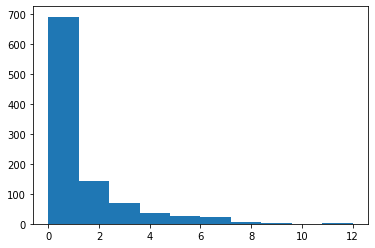

In [23]:
plt.hist(observedTimes, bins=10)